**Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

**Dataset**

In [2]:
df = pd.read_csv('Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
# dependent or response variable
y = df['medv'].copy()

In [4]:
# predictor 
X = df['lstat'].copy()
X

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: lstat, Length: 506, dtype: float64

In [5]:
# add a constant 1 for intercept
X = sm.add_constant(X)
X

,const,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


**Linear Regression**

In [6]:
# instantiate the linear model
linear_model = sm.OLS(y, X)

In [7]:
# fit the model
results = linear_model.fit()

In [8]:
# summarize the regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           5.08e-88
Time:                        15:39:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# get the parameters: intercept and gradient
results.params

const    34.553841
lstat    -0.950049
dtype: float64

**Visualization**

In [10]:
# minimum and maximum 'lstat'
x_min, x_max = X['lstat'].min(), X['lstat'].max()
print(x_min, x_max)

1.73 37.97


In [11]:
# create evenly spaced number from x_min to x_max
x_plot = np.linspace(x_min, x_max, 100)
x_plot[:5]

array([1.73      , 2.09606061, 2.46212121, 2.82818182, 3.19424242])

In [12]:
# calculate the estimate 'medv' value (y_reg) from each 'x_plot'
y_reg = results.params[0] + results.params[1] * x_plot

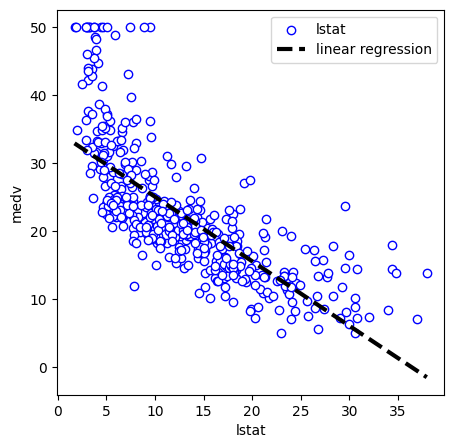

In [13]:
# plot data and regression line
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X['lstat'], y, color='white', edgecolor='blue', label='lstat')
ax.plot(x_plot, y_reg, color='black', ls='--', lw=3, label='linear regression')
ax.set_xlabel('lstat')
ax.set_ylabel('medv')
ax.legend()
plt.show()

**Confidence Interval and Prediction Interval**

In [14]:
# add constant to x_plot
x_plot_df = sm.add_constant(x_plot)

In [15]:
# compute prediction
predictions = results.get_prediction(x_plot_df)

In [16]:
# 95% confidence interval (alpha=5%)
conf_int = predictions.conf_int(alpha=0.05)

In [17]:
# 95% predictions interval (alpha)
pred_int = predictions.conf_int(obs=True, alpha=0.05)

In [18]:
# check the shape
print(conf_int.shape)
print(pred_int.shape)

(100, 2)
(100, 2)


In [19]:
print(conf_int[:5,:])
print('\n')
print(pred_int[:5,:])

[[31.9174432  33.9030678 ]
 [31.59287101 33.5320887 ]
 [31.26804779 33.16136064]
 [30.94295484 32.7909023 ]
 [30.61757181 32.42073405]]


[[20.65797246 45.16253854]
 [20.31205518 44.81290453]
 [19.96607483 44.4633336 ]
 [19.62003138 44.11382576]
 [19.2739248  43.76438106]]


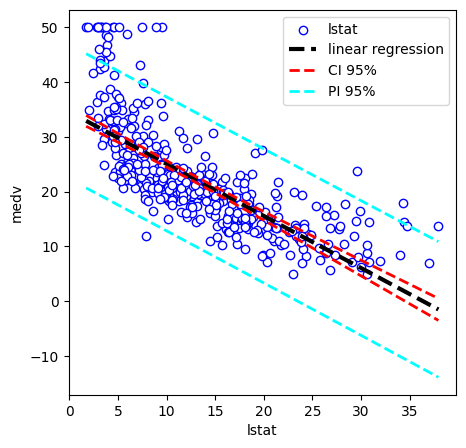

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X['lstat'], y, color='white', edgecolor='blue', label='lstat')
ax.plot(x_plot, y_reg, color='black', ls='--', lw=3, label='linear regression')

# CI 95% lower bound
ax.plot(x_plot, conf_int[:,0], color='red', ls='--', lw=2, label='CI 95%')
# CI 95% upper bound
ax.plot(x_plot, conf_int[:,1], color='red', ls='--', lw=2)

# PI 95% lower bound
ax.plot(x_plot, pred_int[:,0], color='cyan', ls='--', lw=2, label='PI 95%')
# PI 95% upper bound
ax.plot(x_plot, pred_int[:,1], color='cyan', ls='--', lw=2)

ax.set_xlabel('lstat')
ax.set_ylabel('medv')
ax.legend()
plt.show()